Q.1 How many ".csv" files are available in the dataset?

Ans = 4

Q.2 shape of "movies.csv"

In [35]:
import pandas as pd

# Load the data from the "movies.csv" file
movies_df = pd.read_csv('movies.csv')

# Display the shape of the DataFrame
print("Shape of 'movies.csv':", movies_df.shape)


Shape of 'movies.csv': (9742, 3)


Q.3 What is the shape of "ratings.csv"?

In [36]:
import pandas as pd

# Load the data from the "ratings.csv" file
ratings_df = pd.read_csv('ratings.csv')

# Display the shape of the DataFrame
print("Shape of 'ratings.csv':", ratings_df.shape)


Shape of 'ratings.csv': (100836, 4)


Q.4 How many unique "userId" are available in "ratings.csv"?

In [37]:
import pandas as pd

# Load the data from the "ratings.csv" file
ratings_df = pd.read_csv('ratings.csv')

# Count the number of unique userId values
unique_user_ids = ratings_df['userId'].nunique()

# Display the result
print("Number of unique userId values in 'ratings.csv':", unique_user_ids)


Number of unique userId values in 'ratings.csv': 610


Q.5 Which movie has recieved maximum number of user ratings?
*

In [47]:
import pandas as pd

# Load the data from CSV files
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Merge movies and ratings dataframes on movieId
merged_df = pd.merge(movies_df, ratings_df, on='movieId')

# Find the top 5 movies with the maximum number of user ratings
top_5_max_rated_movies = merged_df.groupby('title').size().nlargest(5)

# Display the result for each movie in the top 5
print("Top 5 Movies with the Maximum Number of User Ratings:")
for title, num_ratings in top_5_max_rated_movies.items():
    print(f"Movie: {title}, Number of User Ratings: {num_ratings}")



Top 5 Movies with the Maximum Number of User Ratings:
Movie: Forrest Gump (1994), Number of User Ratings: 329
Movie: Shawshank Redemption, The (1994), Number of User Ratings: 317
Movie: Pulp Fiction (1994), Number of User Ratings: 307
Movie: Silence of the Lambs, The (1991), Number of User Ratings: 279
Movie: Matrix, The (1999), Number of User Ratings: 278


Q.6 Select all the correct tags submitted by users to "Matrix, The (1999)" movie?



In [48]:
import pandas as pd

# Load the data from CSV files
movies_df = pd.read_csv('movies.csv')
tags_df = pd.read_csv('tags.csv')
links_df = pd.read_csv('links.csv')

# Merge movies and tags dataframes on movieId
merged_tags_df = pd.merge(movies_df[movies_df['title'] == 'Matrix, The (1999)'], tags_df, on='movieId')

# Display the tags submitted by users for "Matrix, The (1999)"
print("Tags submitted by users for 'Matrix, The (1999)':")
print(merged_tags_df['tag'].unique())


Tags submitted by users for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


Q.7 What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [49]:
import pandas as pd

# Load the data from CSV files
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Merge movies and ratings dataframes on movieId
merged_df = pd.merge(movies_df, ratings_df, on='movieId')

# Filter for the movie "Terminator 2: Judgment Day (1991)"
terminator_rating_df = merged_df[merged_df['title'] == 'Terminator 2: Judgment Day (1991)']

# Calculate the average user rating
average_rating = terminator_rating_df['rating'].mean()

# Display the result
print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)


Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


Q.8 How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?


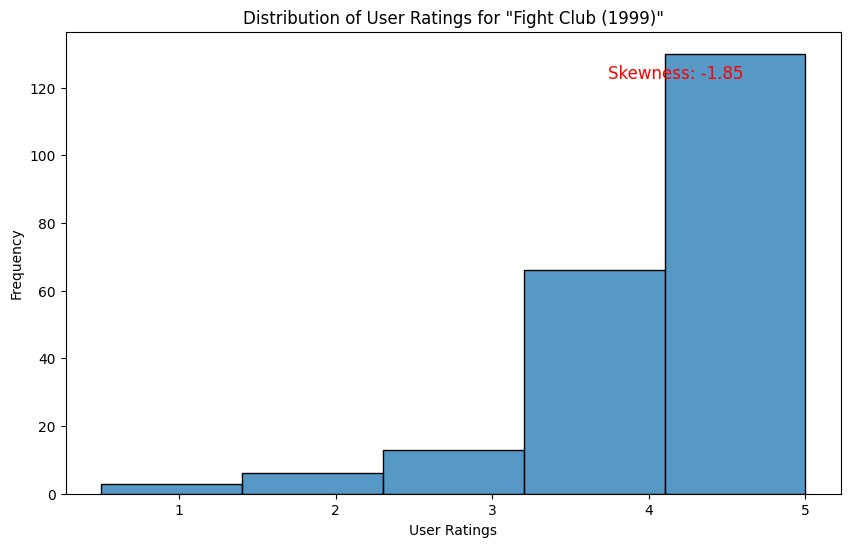

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load the data from CSV files
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Merge movies and ratings dataframes on movieId
merged_df = pd.merge(movies_df, ratings_df, on='movieId')

# Filter for the movie "Fight Club (1999)"
fight_club_ratings_df = merged_df[merged_df['title'] == 'Fight Club (1999)']

# Plot the histogram of user ratings using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings_df['rating'], bins=5, kde=False, edgecolor='black')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('User Ratings')
plt.ylabel('Frequency')

# Calculate skewness
skewness = skew(fight_club_ratings_df['rating'])
plt.annotate(f'Skewness: {skewness:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='red')

plt.show()


Q.9 Which movie is the most popular based on  average user ratings?
*

In [52]:
import pandas as pd

# Load the data from CSV files
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Group user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

# Flatten the multi-level column index
grouped_ratings.columns = ['_'.join(col).strip() for col in grouped_ratings.columns.values]

# Merge movies and grouped ratings dataframes on movieId
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

# Filter only those movies with more than 50 user ratings
popular_movies_df = merged_df[merged_df['rating_count'] > 50]

# Find the most popular movie based on average user ratings
most_popular_movie = popular_movies_df.loc[popular_movies_df['rating_mean'].idxmax()]

# Display the result
print("Most popular movie based on average user ratings:")
print("MovieId:", most_popular_movie['movieId'])
print("Title:", most_popular_movie['title'])
print("Average User Rating:", most_popular_movie['rating_mean'])


Most popular movie based on average user ratings:
MovieId: 318
Title: Shawshank Redemption, The (1994)
Average User Rating: 4.429022082018927


Q.10 Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [53]:
# Display the top 5 popular movies based on number of user ratings
top_5_popular_movies = popular_movies_df.nlargest(5, 'rating_count')

print("Top 5 Popular Movies based on Number of User Ratings:")
for idx, row in top_5_popular_movies.iterrows():
    print("MovieId:", row['movieId'])
    print("Title:", row['title'])
    print("Number of User Ratings:", row['rating_count'])
    print("Average User Rating:", row['rating_mean'])
    print()


Top 5 Popular Movies based on Number of User Ratings:
MovieId: 356
Title: Forrest Gump (1994)
Number of User Ratings: 329
Average User Rating: 4.164133738601824

MovieId: 318
Title: Shawshank Redemption, The (1994)
Number of User Ratings: 317
Average User Rating: 4.429022082018927

MovieId: 296
Title: Pulp Fiction (1994)
Number of User Ratings: 307
Average User Rating: 4.197068403908795

MovieId: 593
Title: Silence of the Lambs, The (1991)
Number of User Ratings: 279
Average User Rating: 4.161290322580645

MovieId: 2571
Title: Matrix, The (1999)
Number of User Ratings: 278
Average User Rating: 4.192446043165468



Q.11 Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [54]:
import pandas as pd

# Load the data from CSV files
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Group user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

# Flatten the multi-level column index
grouped_ratings.columns = ['_'.join(col).strip() for col in grouped_ratings.columns.values]

# Merge movies and grouped ratings dataframes on movieId
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

# Filter only Sci-Fi movies
sci_fi_df = merged_df[merged_df['genres'].str.contains('Sci-Fi', case=False)]

# Filter only those Sci-Fi movies with more than 50 user ratings
popular_sci_fi_df = sci_fi_df[sci_fi_df['rating_count'] > 50]

# Find the third most popular Sci-Fi movie based on the number of user ratings
third_most_popular_sci_fi_movie = popular_sci_fi_df.nlargest(3, 'rating_count').iloc[-1]

# Display the result
print("Third most popular Sci-Fi movie based on number of user ratings:")
print("MovieId:", third_most_popular_sci_fi_movie['movieId'])
print("Title:", third_most_popular_sci_fi_movie['title'])
print("Number of User Ratings:", third_most_popular_sci_fi_movie['rating_count'])
print("Average User Rating:", third_most_popular_sci_fi_movie['rating_mean'])


Third most popular Sci-Fi movie based on number of user ratings:
MovieId: 480
Title: Jurassic Park (1993)
Number of User Ratings: 238
Average User Rating: 3.75


Q.12 Mention the movieId of the movie which has the highest IMDB rating.
*


In [55]:
import pandas as pd

# Load the data from CSV files
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
links_df = pd.read_csv('links.csv')

# Merge movies and ratings dataframes on movieId
merged_df = pd.merge(movies_df, ratings_df, on='movieId')

# Filter movies with more than 50 user ratings
filtered_df = merged_df.groupby('movieId').filter(lambda x: len(x) > 50)

# Merge with links dataframe to get IMDB ratings
final_df = pd.merge(filtered_df, links_df, on='movieId')

# Find the top 5 movies with the highest IMDB ratings
top_5_movies = final_df.groupby('movieId').agg({'imdbId': 'max', 'title': 'first', 'userId': 'count'}).nlargest(5, 'imdbId')

# Print the top 5 movies with their movieId, title, IMDB rating, and number of user reviews
print("Top 5 Movies with the Highest IMDB Ratings:")
for idx, row in top_5_movies.iterrows():
    print(f"MovieId: {idx}, Title: {row['title']}, IMDB Rating: {row['imdbId']}, Number of User Reviews: {row['userId']}")

Top 5 Movies with the Highest IMDB Ratings:
MovieId: 109374, Title: Grand Budapest Hotel, The (2014), IMDB Rating: 2278388, Number of User Reviews: 52
MovieId: 112852, Title: Guardians of the Galaxy (2014), IMDB Rating: 2015381, Number of User Reviews: 59
MovieId: 99114, Title: Django Unchained (2012), IMDB Rating: 1853728, Number of User Reviews: 71
MovieId: 81845, Title: King's Speech, The (2010), IMDB Rating: 1504320, Number of User Reviews: 58
MovieId: 122904, Title: Deadpool (2016), IMDB Rating: 1431045, Number of User Reviews: 54


Q.13 Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [56]:
import pandas as pd

# Load the data from CSV files
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
links_df = pd.read_csv('links.csv')

# Merge movies and ratings dataframes on movieId
merged_df = pd.merge(movies_df, ratings_df, on='movieId')

# Filter movies with more than 50 user ratings
filtered_df = merged_df.groupby('movieId').filter(lambda x: len(x) > 50)

# Merge with links dataframe to get IMDB ratings
final_df = pd.merge(filtered_df, links_df, on='movieId')

# Filter Sci-Fi movies
sci_fi_df = final_df[final_df['genres'].str.contains('Sci-Fi', case=False)]

# Find the top 5 Sci-Fi movies with the highest IMDB ratings
top_5_sci_fi_movies = sci_fi_df.groupby('movieId').agg({'imdbId': 'max', 'title': 'first', 'userId': 'count'}).nlargest(5, 'imdbId')

# Print the top 5 Sci-Fi movies with their movieId, title, IMDB rating, and number of user ratings
print("Top 5 Sci-Fi Movies with the Highest IMDB Ratings:")
for idx, row in top_5_sci_fi_movies.iterrows():
    print(f"MovieId: {idx}, Title: {row['title']}, IMDB Rating: {row['imdbId']}, Number of User Ratings: {row['userId']}")


Top 5 Sci-Fi Movies with the Highest IMDB Ratings:
MovieId: 112852, Title: Guardians of the Galaxy (2014), IMDB Rating: 2015381, Number of User Ratings: 59
MovieId: 122904, Title: Deadpool (2016), IMDB Rating: 1431045, Number of User Ratings: 54
MovieId: 91500, Title: The Hunger Games (2012), IMDB Rating: 1392170, Number of User Ratings: 54
MovieId: 79132, Title: Inception (2010), IMDB Rating: 1375666, Number of User Ratings: 143
MovieId: 70286, Title: District 9 (2009), IMDB Rating: 1136608, Number of User Ratings: 65
